In [19]:
train_op = """Epoch 001: | Loss: 0.28444 | Acc: 88.261
Epoch 002: | Loss: 0.22960 | Acc: 90.766
Epoch 003: | Loss: 0.21027 | Acc: 91.623
Epoch 004: | Loss: 0.19450 | Acc: 92.326
Epoch 005: | Loss: 0.18056 | Acc: 92.987
Epoch 006: | Loss: 0.16897 | Acc: 93.401
Epoch 007: | Loss: 0.15899 | Acc: 93.876
Epoch 008: | Loss: 0.15008 | Acc: 94.243
Epoch 009: | Loss: 0.14064 | Acc: 94.530
Epoch 010: | Loss: 0.13719 | Acc: 94.692
Epoch 011: | Loss: 0.13174 | Acc: 94.920
Epoch 012: | Loss: 0.12523 | Acc: 95.209
Epoch 013: | Loss: 0.11853 | Acc: 95.445
Epoch 014: | Loss: 0.11177 | Acc: 95.745
Epoch 015: | Loss: 0.10546 | Acc: 96.032
Epoch 016: | Loss: 0.10443 | Acc: 96.025
Epoch 017: | Loss: 0.10048 | Acc: 96.148
Epoch 018: | Loss: 0.09396 | Acc: 96.430
Epoch 019: | Loss: 0.09038 | Acc: 96.514
Epoch 020: | Loss: 0.08704 | Acc: 96.695
Epoch 021: | Loss: 0.08715 | Acc: 96.659
Epoch 022: | Loss: 0.08259 | Acc: 96.851
Epoch 023: | Loss: 0.07698 | Acc: 97.064
Epoch 024: | Loss: 0.07653 | Acc: 97.117
Epoch 025: | Loss: 0.07771 | Acc: 97.000
Epoch 026: | Loss: 0.07360 | Acc: 97.201
Epoch 027: | Loss: 0.07213 | Acc: 97.177
Epoch 028: | Loss: 0.06737 | Acc: 97.421
Epoch 029: | Loss: 0.06537 | Acc: 97.512
Epoch 030: | Loss: 0.06402 | Acc: 97.550
Epoch 031: | Loss: 0.06140 | Acc: 97.660
Epoch 032: | Loss: 0.05935 | Acc: 97.757
Epoch 033: | Loss: 0.05786 | Acc: 97.805
Epoch 034: | Loss: 0.05893 | Acc: 97.750
Epoch 035: | Loss: 0.05572 | Acc: 97.859
Epoch 036: | Loss: 0.05636 | Acc: 97.857
Epoch 037: | Loss: 0.05237 | Acc: 98.019
Epoch 038: | Loss: 0.05386 | Acc: 98.000
Epoch 039: | Loss: 0.05014 | Acc: 98.085
Epoch 040: | Loss: 0.05077 | Acc: 98.055
Epoch 041: | Loss: 0.04821 | Acc: 98.169
Epoch 042: | Loss: 0.04974 | Acc: 98.141
Epoch 043: | Loss: 0.04612 | Acc: 98.258
Epoch 044: | Loss: 0.04576 | Acc: 98.244
Epoch 045: | Loss: 0.04796 | Acc: 98.168
Epoch 046: | Loss: 0.04214 | Acc: 98.388
Epoch 047: | Loss: 0.04353 | Acc: 98.370
Epoch 048: | Loss: 0.04294 | Acc: 98.416
Epoch 049: | Loss: 0.04082 | Acc: 98.467
Epoch 050: | Loss: 0.04134 | Acc: 98.430"""

In [36]:
train_data = list(map(lambda x:x.split(" | "), train_op.split("\n")))

In [37]:
train_data = list(map(lambda x: (int(x[0][6:-1]), float(x[1][6:]), float(x[2][5:])), train_data))

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
data = np.array(train_data)

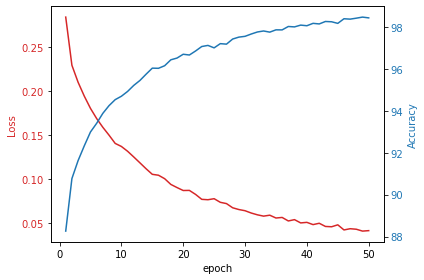

In [43]:
t = data[:,0]
data1 = data[:,1]
data2 = data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [48]:
import pandas as pd
df = pd.read_csv("C:/Users/monil/Desktop/BMI 598 - NLP/Project/Clinical-Entity-Normalization/dataframe_with_candidate_cuis_train.csv")
df.shape

(6780, 9)

In [66]:
import pickle
with open("C:/Users/monil/Desktop/BMI 598 - NLP/Project/Clinical-Entity-Normalization/all_data.pk", "rb") as f:
    obj = pickle.load(f)
df = pd.DataFrame(obj)
df.groupby('id').apply(lambda x: (Counter(x['cui']==x['actual_cui'])[False]/len(x))).mean()


0.7297317840468036

In [109]:
id, ac, sen, st,ed,defin,c = df[df['actual_cui']=='C0428284'].values[0]
sen[st:ed]

'electrolyte'

In [102]:
df.groupby('id').apply(lambda x: (Counter(x['cui']==x['actual_cui']),len(x), x['actual_cui'].values[0]))

id
0          ({True: 5, False: 1}, 6, C0019699)
2       ({True: 11, False: 22}, 33, C0027497)
3       ({True: 11, False: 26}, 37, C0042963)
5          ({True: 5, False: 1}, 6, C0019699)
6        ({True: 8, False: 37}, 45, C0005841)
                        ...                  
7079              ({False: 15}, 15, C0428284)
7080                ({False: 2}, 2, C0205179)
7081       ({True: 3, False: 2}, 5, C0376358)
7084     ({False: 11, True: 1}, 12, C0750502)
7085              ({False: 71}, 71, C0033213)
Length: 5251, dtype: object

In [97]:
d = df[df['cui'] == 'C0027497']
d[d['actual_cui']=='C0027497']

,id,actual_cui,sentence,start,end,definition,cui
6,2,C0027497,004668411 CTMC 68299235 763052 9/29/1993 12:00...,316,322,Nausea means an unpleasant sensation in the st...,C0027497
7,2,C0027497,004668411 CTMC 68299235 763052 9/29/1993 12:00...,316,322,Nausea means unpleasant sensation in the stoma...,C0027497
8,2,C0027497,004668411 CTMC 68299235 763052 9/29/1993 12:00...,316,322,"Nausea means nevolnost, pocit na zvracení. obj...",C0027497
9,2,C0027497,004668411 CTMC 68299235 763052 9/29/1993 12:00...,316,322,Nausea means sensação desagradável no estômago...,C0027497
10,2,C0027497,004668411 CTMC 68299235 763052 9/29/1993 12:00...,316,322,Nausea means a sensation of unease in the stom...,C0027497
...,...,...,...,...,...,...,...
141311,6769,C0027497,879492218 YC 53470378 3210349 6/26/2004 12:00:...,859,865,Nausea means distaste for food/fluid and an ur...,C0027497
141312,6769,C0027497,879492218 YC 53470378 3210349 6/26/2004 12:00:...,859,865,Nausea means a disorder characterized by a que...,C0027497
141313,6769,C0027497,879492218 YC 53470378 3210349 6/26/2004 12:00:...,859,865,Nausea means a feeling of sickness or discomfo...,C0027497
141314,6769,C0027497,879492218 YC 53470378 3210349 6/26/2004 12:00:...,859,865,Nausea means upper abdominal discomfort associ...,C0027497


In [49]:
import pandas as pd
df = pd.read_csv("C:/Users/monil/Desktop/BMI 598 - NLP/Project/Clinical-Entity-Normalization/dataframe_with_candidate_cuis_test.csv")
df.shape

(7086, 9)

In [67]:
import pickle
with open("C:/Users/monil/Desktop/BMI 598 - NLP/Project/Clinical-Entity-Normalization/all_data_test.pk", "rb") as f:
    obj = pickle.load(f)
df = pd.DataFrame(obj)
df.groupby('id').apply(lambda x: (Counter(x['cui']==x['actual_cui'])[False]/len(x))).mean()

0.7551857868001364

a
1             ({False: 2}, 2)
2    ({False: 1, True: 1}, 2)
3    ({False: 2, True: 1}, 3)
dtype: object
